In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model

from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data=pd.read_csv('baseball.csv')  # read the data
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
print(data.shape) # check the no. of rows & column
print(data.isna().sum()) #finding the count of missing value

(30, 17)
W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [4]:
data.info() #printing the summary of data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
data.drop_duplicates(inplace=True) #remove duplicates if any
print(data.shape)
data.describe()   #understand data at high level check the stastics of dataset

(30, 17)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


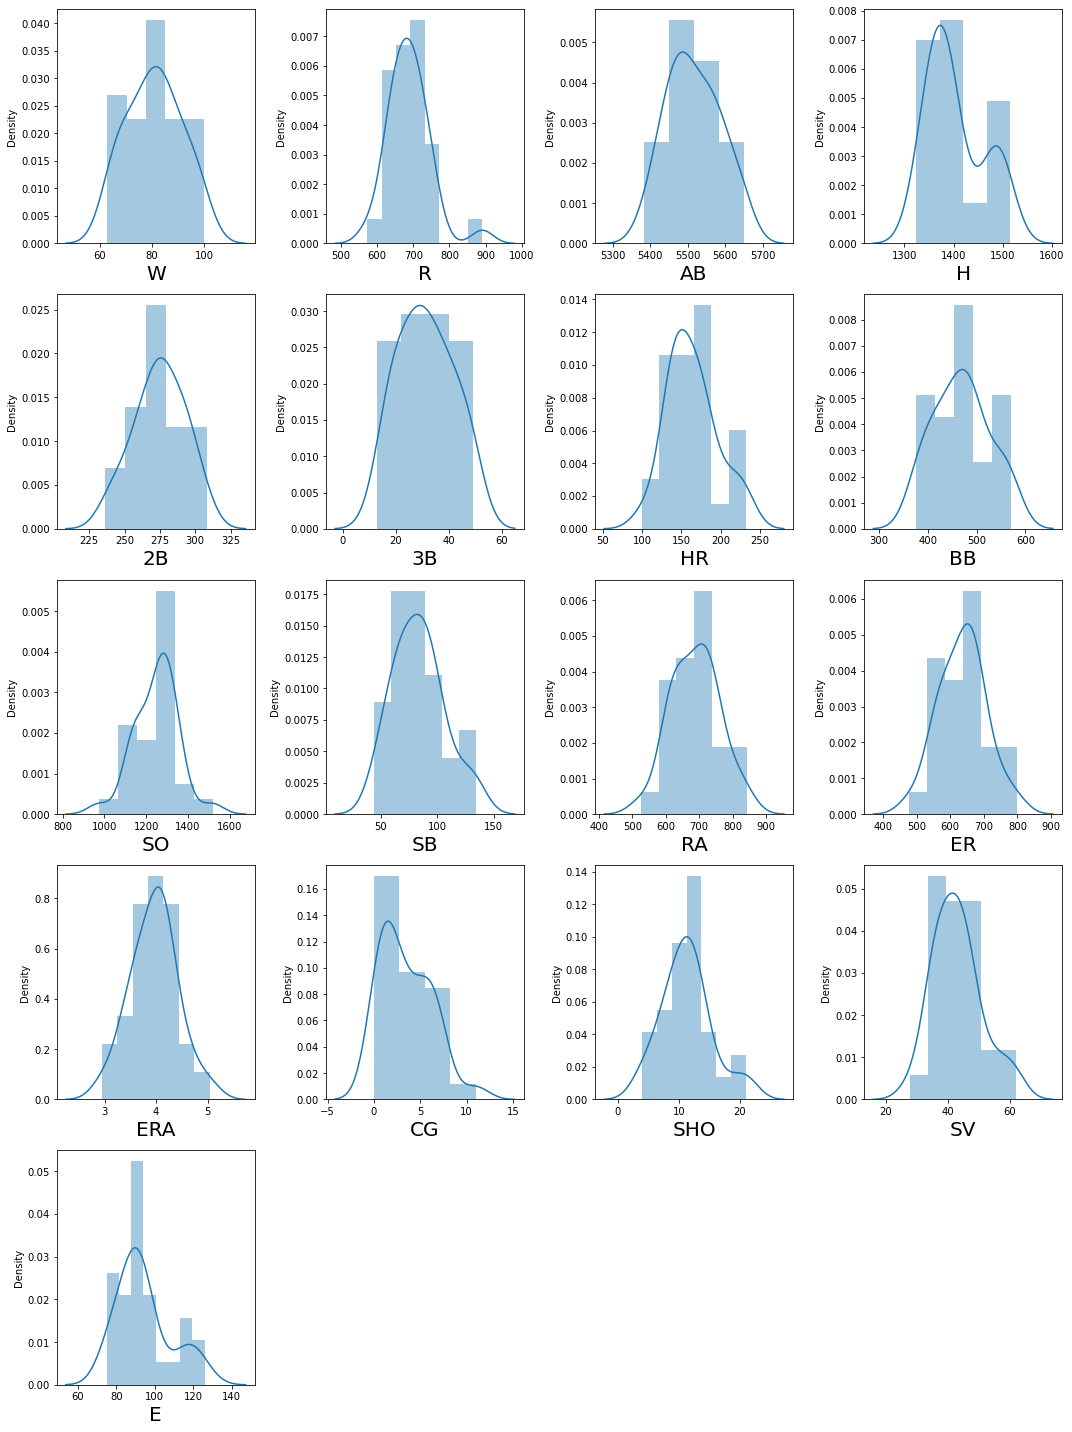

In [6]:
#Let's see the how data is distributed or Graphical analysis
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

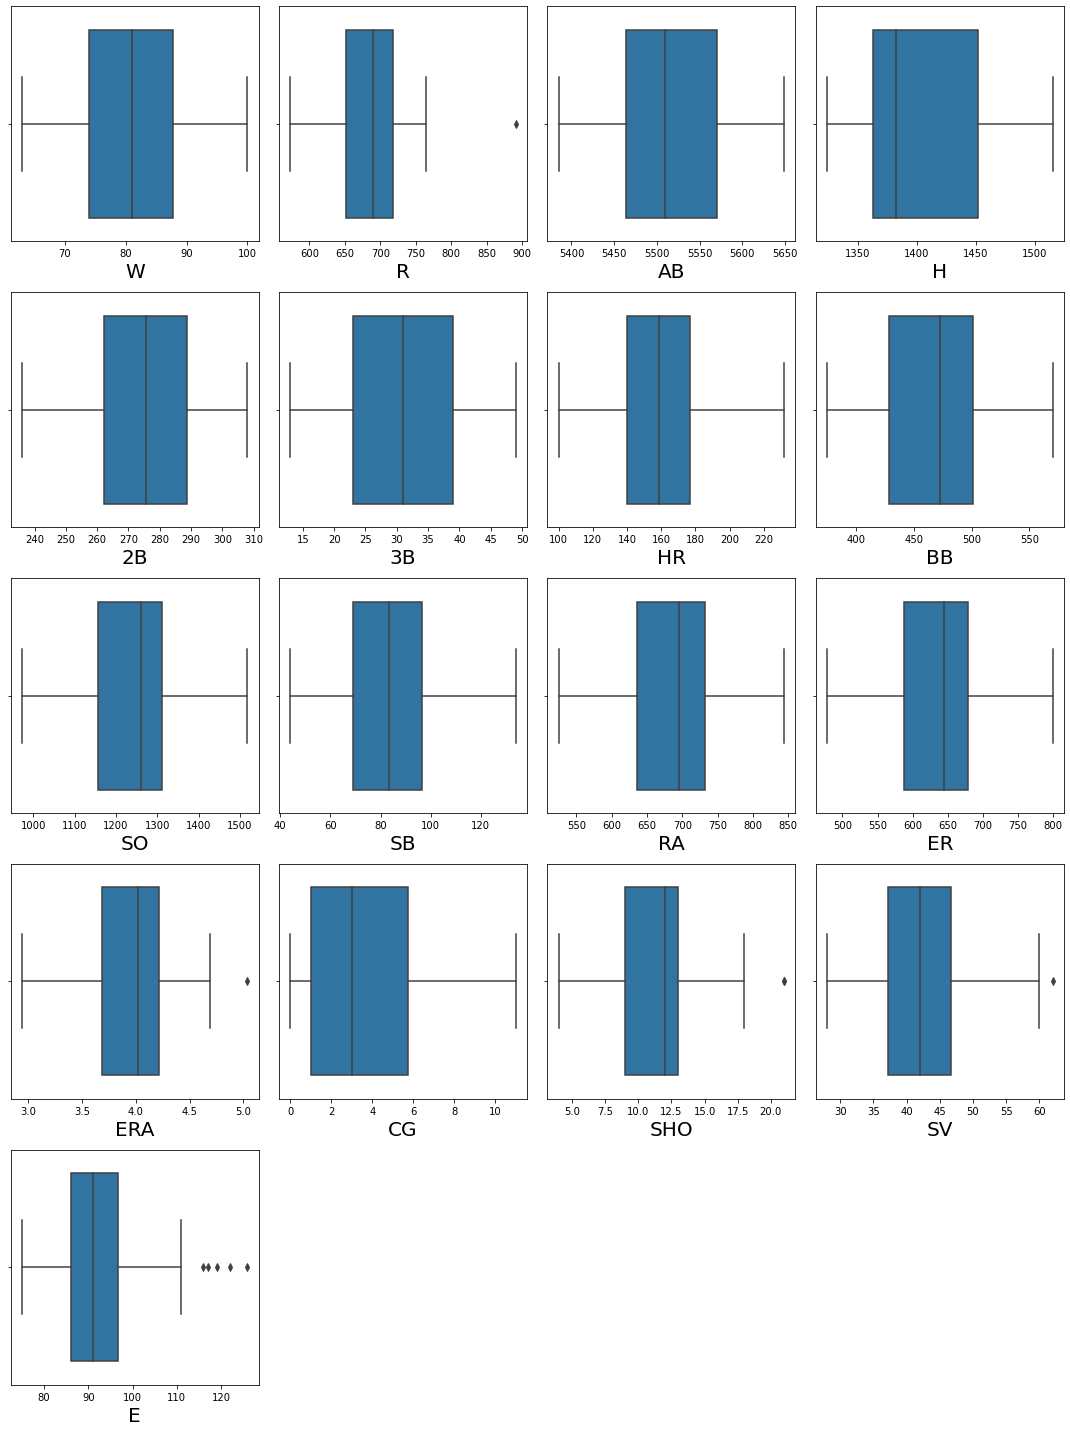

In [7]:
# lets visulize the outliers 
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [8]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

R_H=(q3.R+(1.5*iqr.R))
E_H=(q3.E+(1.5*iqr.E))
ERA_H=(q3.ERA+(1.5*iqr.ERA))
SHO_H=(q3.SHO+(1.5*iqr.SHO))
SV_H=(q3.SV+(1.5*iqr.SV))
H_H=(q3.H+(1.5*iqr.H))


In [9]:
Index=np.where(data['R']>R_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([5], dtype=int64),)


(29, 17)

In [10]:
Index=np.where(data['E']>E_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([ 9, 13, 15, 17, 23], dtype=int64),)


(24, 17)

In [11]:
Index=np.where(data['ERA']>ERA_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([23], dtype=int64),)


(23, 17)

In [12]:
Index=np.where(data['SHO']>SHO_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([13, 19], dtype=int64),)


(21, 17)

In [13]:
Index=np.where(data['SV']>SV_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([12], dtype=int64),)


(20, 17)

In [14]:
Index=np.where(data['H']>H_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([], dtype=int64),)


(20, 17)

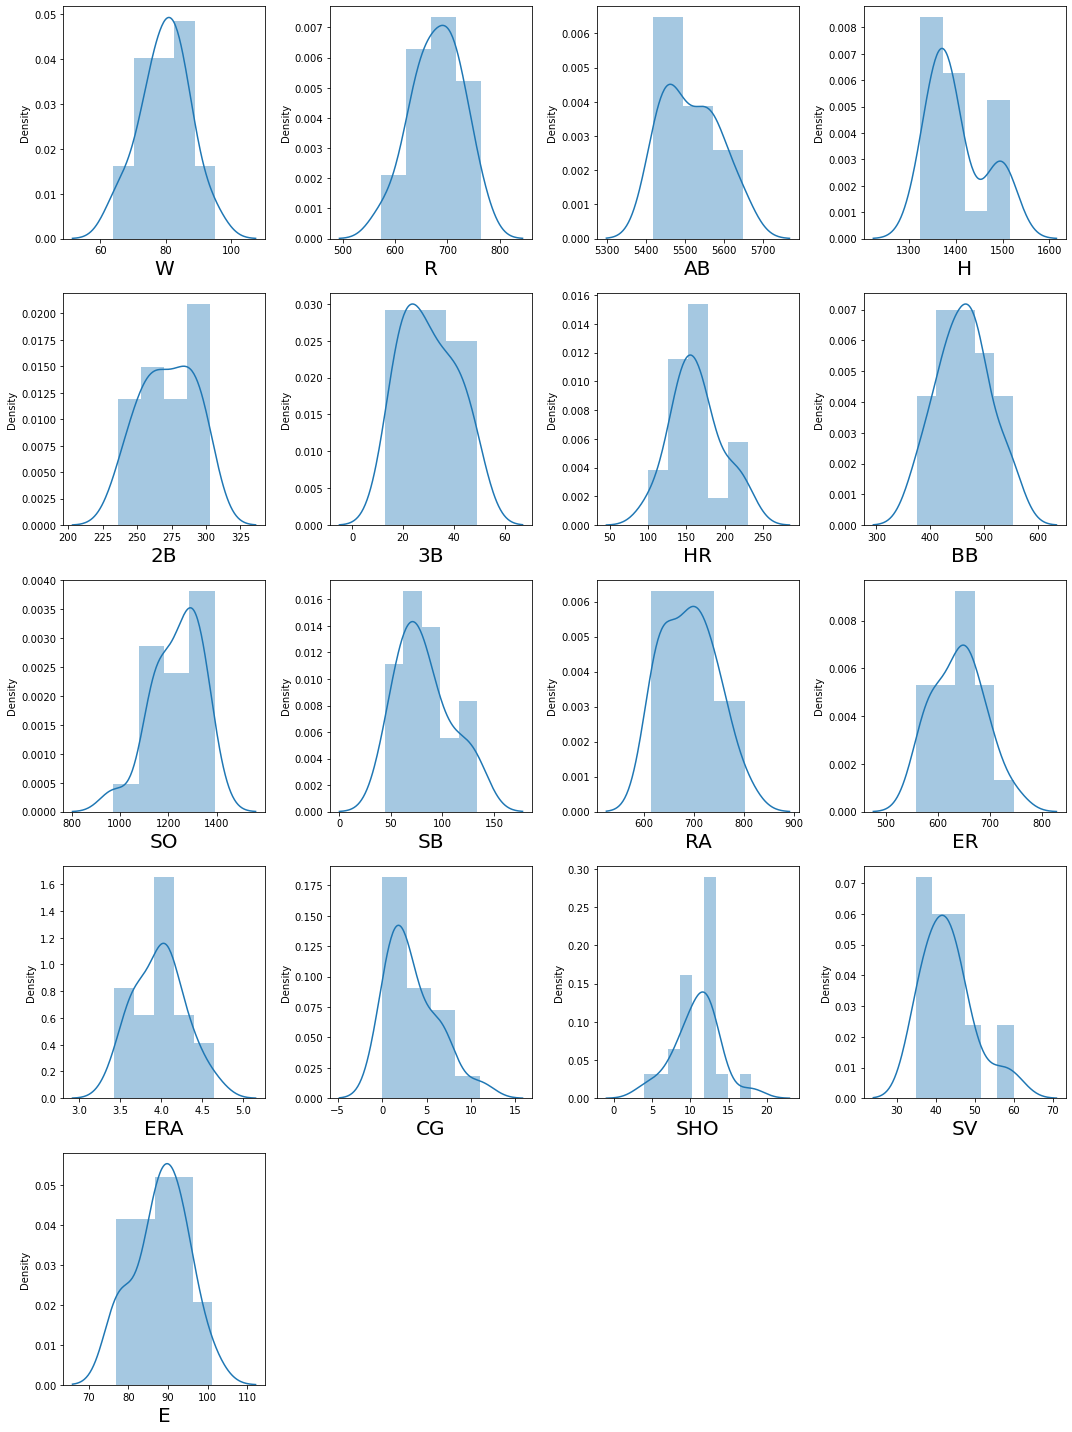

In [15]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
data.shape

(20, 17)

In [17]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['W'])
y=data['W']

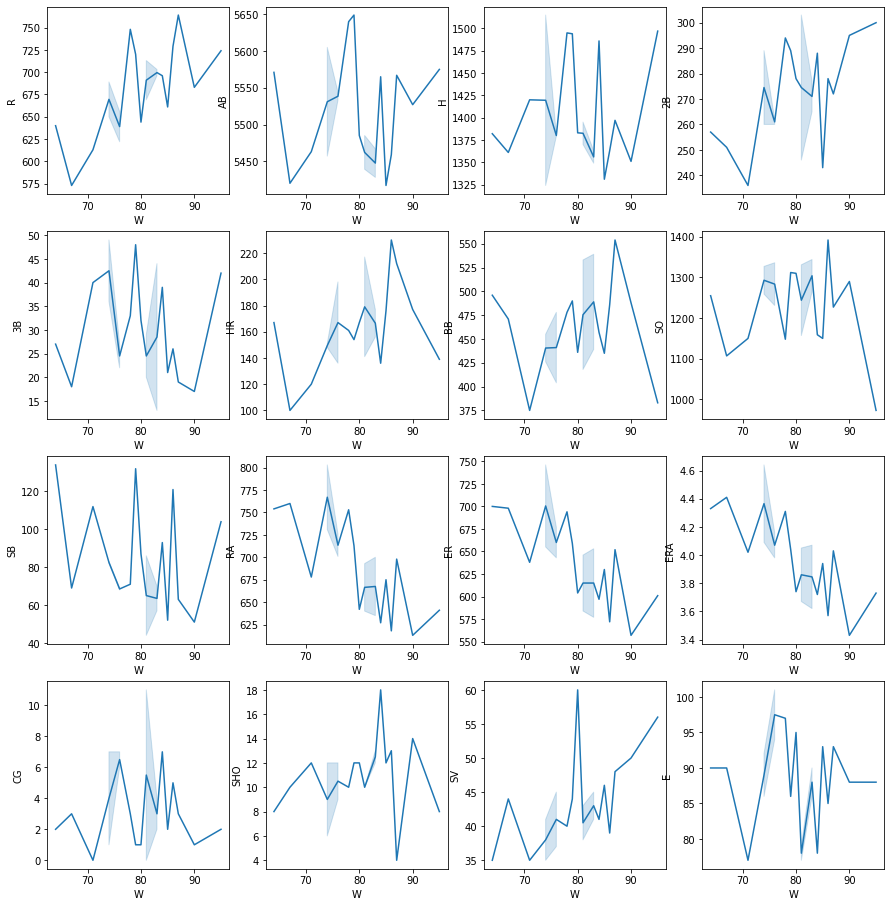

In [18]:
# see how featurs r related to lable
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [19]:
x=data.drop(columns=['W','RA','ER'])
y=data['W']

In [20]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
vif

,vif,featurs
0,20.927595,R
1,7.023730,AB
2,13.874280,H
3,6.481769,2B
4,14.311009,3B
5,18.689766,HR
6,6.970642,BB
7,5.615168,SO
8,5.500701,SB
9,6.702829,ERA


Text(0.5, 1.0, 'PCA')

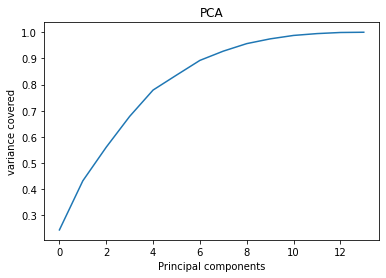

In [22]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel("variance covered")
plt.title("PCA")

In [24]:
pca=PCA(n_components=7)
new_comp=pca.fit_transform(x_scaled)
pri_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pri_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.046307,0.212505,-1.235941,3.183789,0.918239,0.197480,1.244417
1,-0.085664,0.380853,0.286611,0.698300,-0.613903,0.200106,-0.354991
2,0.593409,-0.770079,2.571062,-1.050644,2.348791,-0.097173,1.694082
3,-0.542643,1.612756,-0.702362,-0.951804,1.416925,-0.708081,-1.026019
4,3.225455,0.283555,-0.125666,-1.980734,-0.097498,0.793257,-1.250547
5,-0.945004,-2.608545,-2.562219,-0.645688,0.552509,0.742856,1.457710
6,-2.073123,-0.335194,-0.098339,0.336868,-2.065889,2.326297,0.042273
7,-0.848482,-0.183894,-0.561177,2.332978,-0.113115,-1.700404,-0.893979
8,2.241592,-1.072123,-2.009591,-0.588118,0.802516,0.826587,-0.663000
9,-0.904457,-2.305577,1.679212,-0.601491,-1.629635,-0.954093,0.607270


In [28]:
#Split data into train & test by using this new fetures (pri_comp)
x_train,x_test,y_train,y_test=train_test_split(pri_comp,y,test_size=0.35,random_state=35)

In [29]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [30]:
# Model no.1
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV

lcv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)

0.47892546890499915
Train Report: 0.860330800835019
Test Report: 0.8270444110380353
RMSE: 3.0618456628180852
MAE: 2.499013250529298
MSE: 9.37489886291792


In [31]:
# Model no.2
rcv=RidgeCV(alphas=0.05,normalize=True)
rcv.fit(x_train,y_train)

alpha=rcv.alpha_
print(alpha)

Ridge_reg=Ridge(alpha).fit(x_train,y_train)

print_score(Ridge_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Ridge_reg,x_train,x_test,y_train,y_test,train=False)

0.05
Train Report: 0.9113012925699457
Test Report: 0.2816645853086239
RMSE: 6.2399288022826855
MAE: 5.679626045091682
MSE: 38.93671145755703


In [32]:
# Model no.3
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)

Train Report: 0.9113201865215973
Test Report: 0.2632781882803986
RMSE: 6.319282334490628
MAE: 5.757434459365361
MSE: 39.93332922300533


In [33]:
# Model no.4
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)

Train Report: 0.9999999938779353
Test Report: 0.5499494996168444
RMSE: 4.939086358992412
MAE: 4.317411150251116
MSE: 24.394574061584926


In [216]:
# Model no.5
#Model no.5
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)

Train Report: 0.9893683039571454
Test Report: 0.40762451171875025
RMSE: 5.805134221818934
MAE: 4.724999999999999
MSE: 33.699583333333315


In [220]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1,0.05],'n_estimators':[20,50,70,10]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=5)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 70}

In [34]:
xgb=XGBRegressor(learning_rate= 0.5, max_depth=3,n_estimators=70)
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)

Train Report: 0.9999999955967385
Test Report: 0.6051503865322934
RMSE: 4.626279356137616
MAE: 3.8616550990513394
MSE: 21.402460681025072


In [232]:
# Hyper tuning by using RandomizedSearchCV With XGBoost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
para={'min_samples_split':range(0,20,2),'random_state':[41,20,80,35],'max_depth':range(4,12,2)}
rand=RandomizedSearchCV(estimator=dt, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 35, 'min_samples_split': 16, 'max_depth': 6}

In [233]:
dt=DecisionTreeRegressor(max_depth=6,random_state=35,min_samples_split=16)
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)

Train Report: 0.9999999936614188
Test Report: 0.6555121556747281
RMSE: 4.4269098363749455
MAE: 4.006459554036458
MSE: 19.597530699393246


# Conclusion:- Looking at the R2_score & 2 minimum errors i have selected LassoCV model is the best model